In [5]:
## imports ~
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import matplotlib
matplotlib.rcParams["figure.dpi"]= 300
from IPython.display import clear_output
from time import sleep

In [6]:
#@title Helper Functions ~
### Helper Functions ###
def MSneuron(input_vector, weights):
  """ returns the activation of MS(Max-sat) type neurons as 1d binary vector
      input_vector: 1d binary input vector 
      weights: weights corresponding to each input """
  
  n = len(input_vector)
  input_vector = np.multiply(input_vector, weights)
  output_vector = np.zeros((n,1))
  output_vector[np.where(input_vector== max(input_vector))[0]] = 1

  return output_vector

def MCneuron(input_vector, weights):
  """ returns the actiation of MC(Max-cutoff) type neurons as 1d binary vector
      input_vector: 1d binary input vector 
      weights: weights corresponding to each input """
  
  n = len(input_vector)
  cutoff = max( np.multiply(input_vector, weights) )
  output_vector = np.zeros((n,1))
  for neuron in range(n): 
    if weights[neuron] >= cutoff: output_vector[neuron] = 1 

  return output_vector

def RogueCoupleCheck(matching_vector,W_boy, W_girl):
    """ return thr number of rogue couples under current matching ~
        matching_vector: the matching grid in !d vector form 
        W_boy: prefernce matrix of Boys
        W_girl: prefernce matrix of Girls """

    N = len(matching_vector)
    n = int(np.sqrt(N))
    matching = matching_vector.reshape((n,n))

    rogue_couples = 0
    for girl in range(n):
      boy_pref = np.where(matching[:, girl]==1)[0]
      if len(boy_pref) != 1: raise RuntimeError("invalid matching")
      for boy in range(n):
        girl_pref = np.where(matching[boy, :]== 1)[0]
        if len(girl_pref) != 1: raise RuntimeError('invalid matching')
        ## assuming lower weight => lower prefernce ~ 
        if W_girl[girl, boy_pref] < W_girl[girl, boy]:
          if W_boy[boy, girl_pref] < W_boy[boy, girl]:
            rogue_couples += 1 
    
    return rogue_couples    



In [7]:
### Main Driver Code ###
def Run(boy_pref, girl_pref, steps):
  
  n = len(boy_pref)
  boy_match = np.zeros((n,n))
  girl_match = np.ones((n,n))

  boylabels, girllabels = [],[]
  for _ in range(n): 
    girllabels.append("girl"+str(_))
    boylabels.append("boy"+str(_))

  for _ in range(steps):
    ## boys propose ~
    for boy in range(n): boy_match[boy] = MSneuron(girl_match[boy,:], boy_pref[boy,:]).transpose()
    ## girls dispose ~
    for girl in range(n): girl_match[:,girl] = MCneuron(boy_match[:,girl], girl_pref[:,girl]).transpose()

    ## plotting sub-routine ~
    clear_output(wait=True)
    plt.figure(figsize= (12,10))
    plt.figure(figsize=(12,10))
    plt.subplot(221)
    plt.title("Boy's match")
    sns.heatmap(boy_match,xticklabels = girllabels, yticklabels= boylabels)
    plt.subplot(222)
    plt.title("Girl's match")
    sns.heatmap(girl_match,xticklabels = girllabels, yticklabels= boylabels)
    sleep(0.2)
    plt.show()
  
  return boy_match

<Figure size 3600x3000 with 0 Axes>

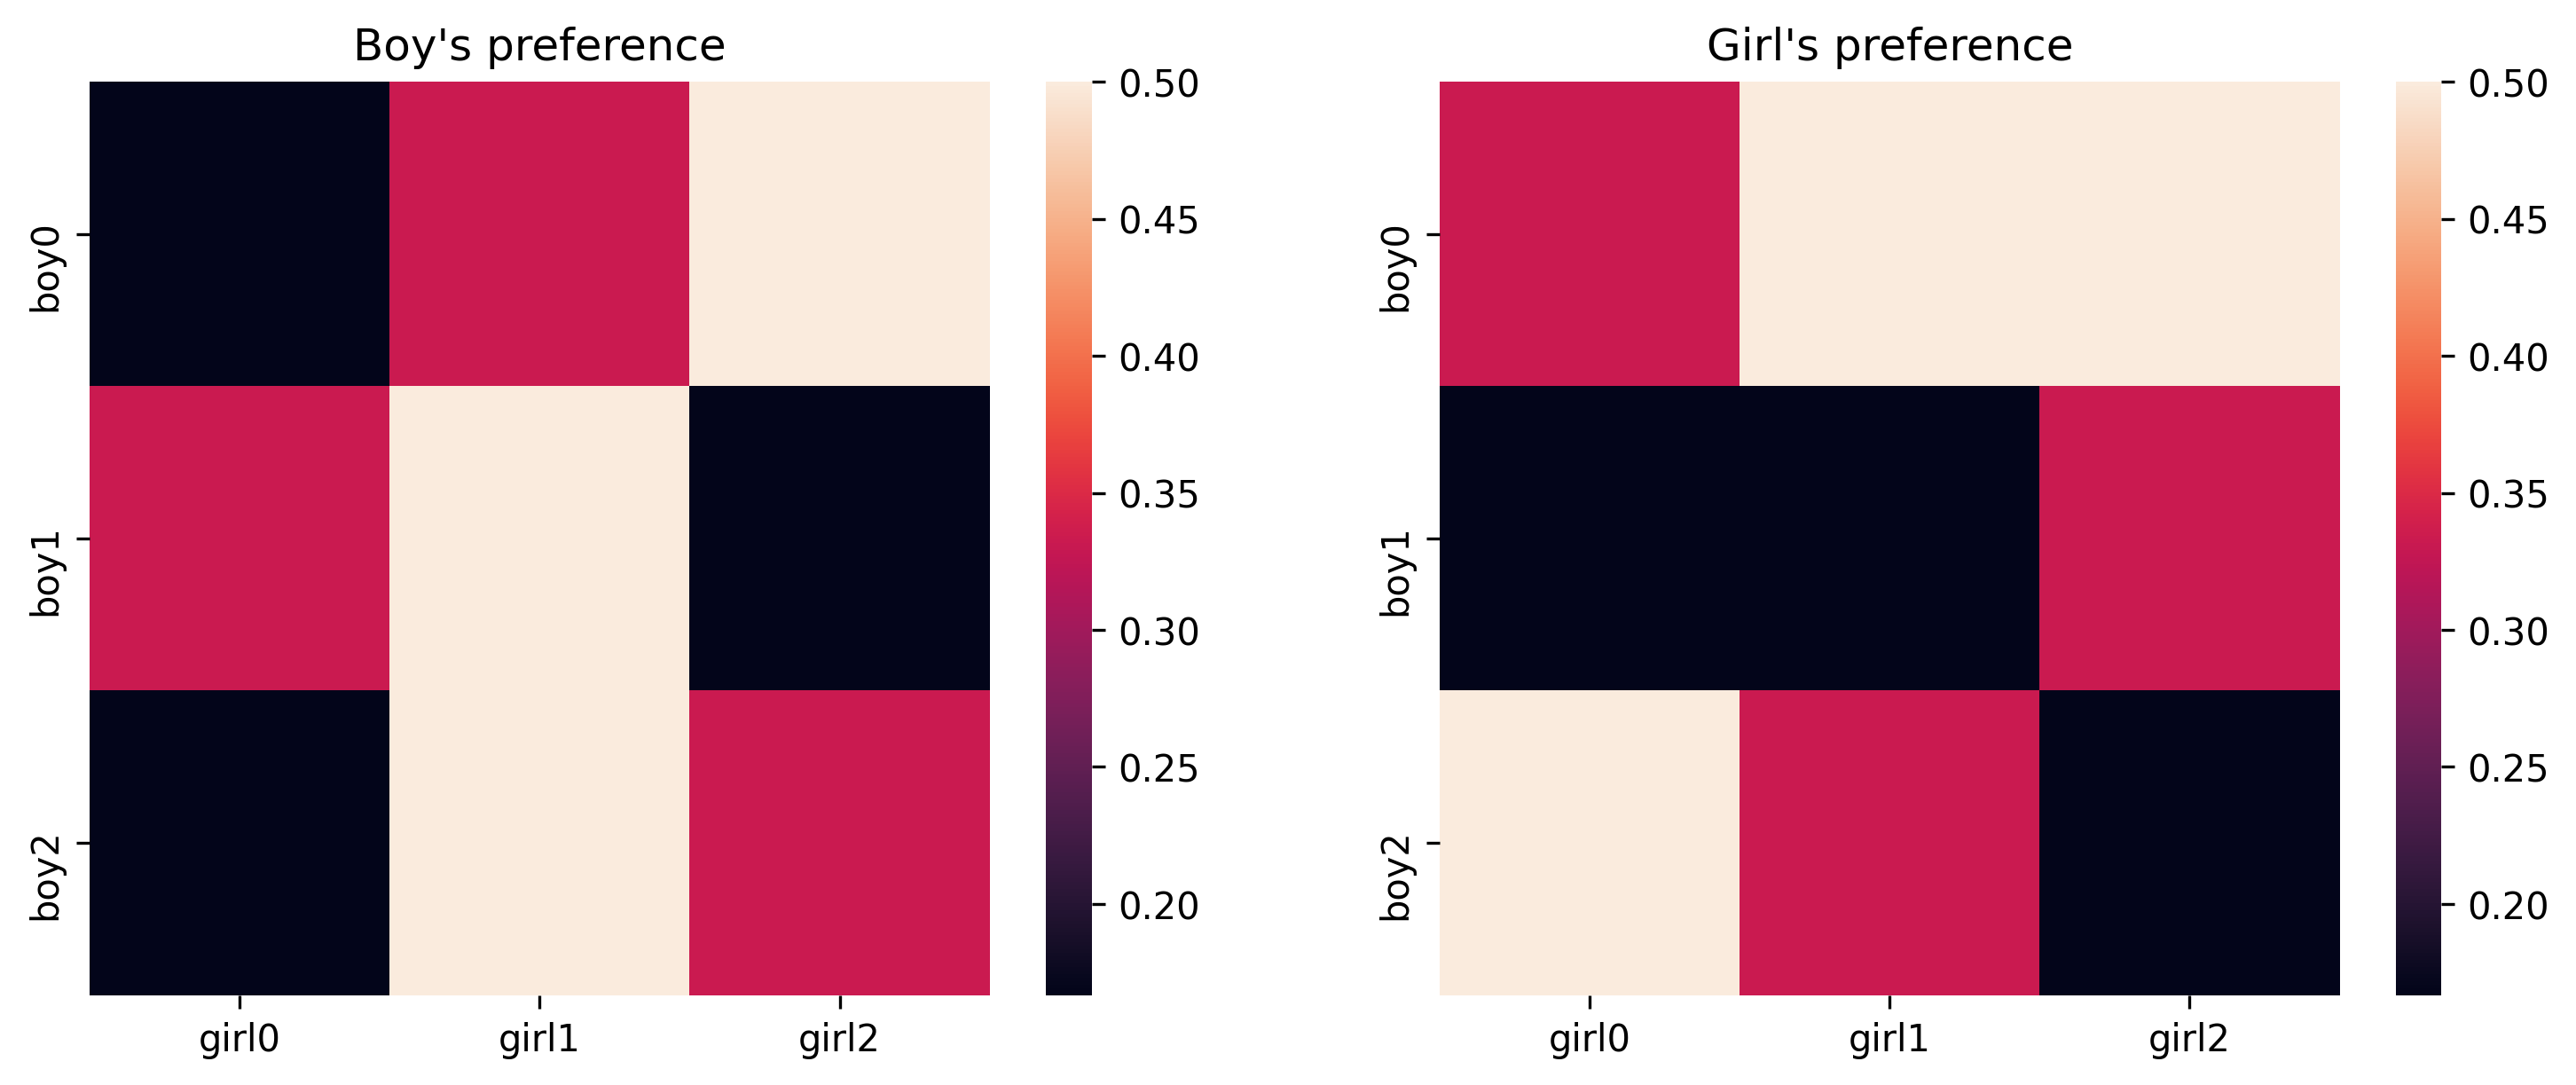

In [8]:
### Initializations ###
## size of matching n ~
n= 3
## no. of neurons N ~
N = n*n

## initialize prefernce table ~
""" The entries denote the weight of prefernce; higher weight => higher prefernce,
    e.g. if n=3, boy_pref[0][2]= 3 => boy_0 has highest prefernce for girl_2 i.e 3
    the entries are normalised to be < 1 by dividing by their sum """
boy_pref = np.array([[1,2,3],[2,3,1],[1,3,2]]) / (n*(n+1)/2)  
girl_pref = np.array([[2,1,3],[3,1,2],[3,2,1]]).transpose() / (n*(n+1)/2)

## print W and Preference matrix ~
boylabels, girllabels = [],[]
for _ in range(n): 
  girllabels.append("girl"+str(_))
  boylabels.append("boy"+str(_))  
plt.figure(figsize= (12,10))
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.title("Boy's preference")
sns.heatmap(boy_pref,xticklabels = girllabels, yticklabels= boylabels)
plt.subplot(222)
plt.title("Girl's preference" )
sns.heatmap(girl_pref ,xticklabels = girllabels, yticklabels= boylabels)
plt.show()

<Figure size 3600x3000 with 0 Axes>

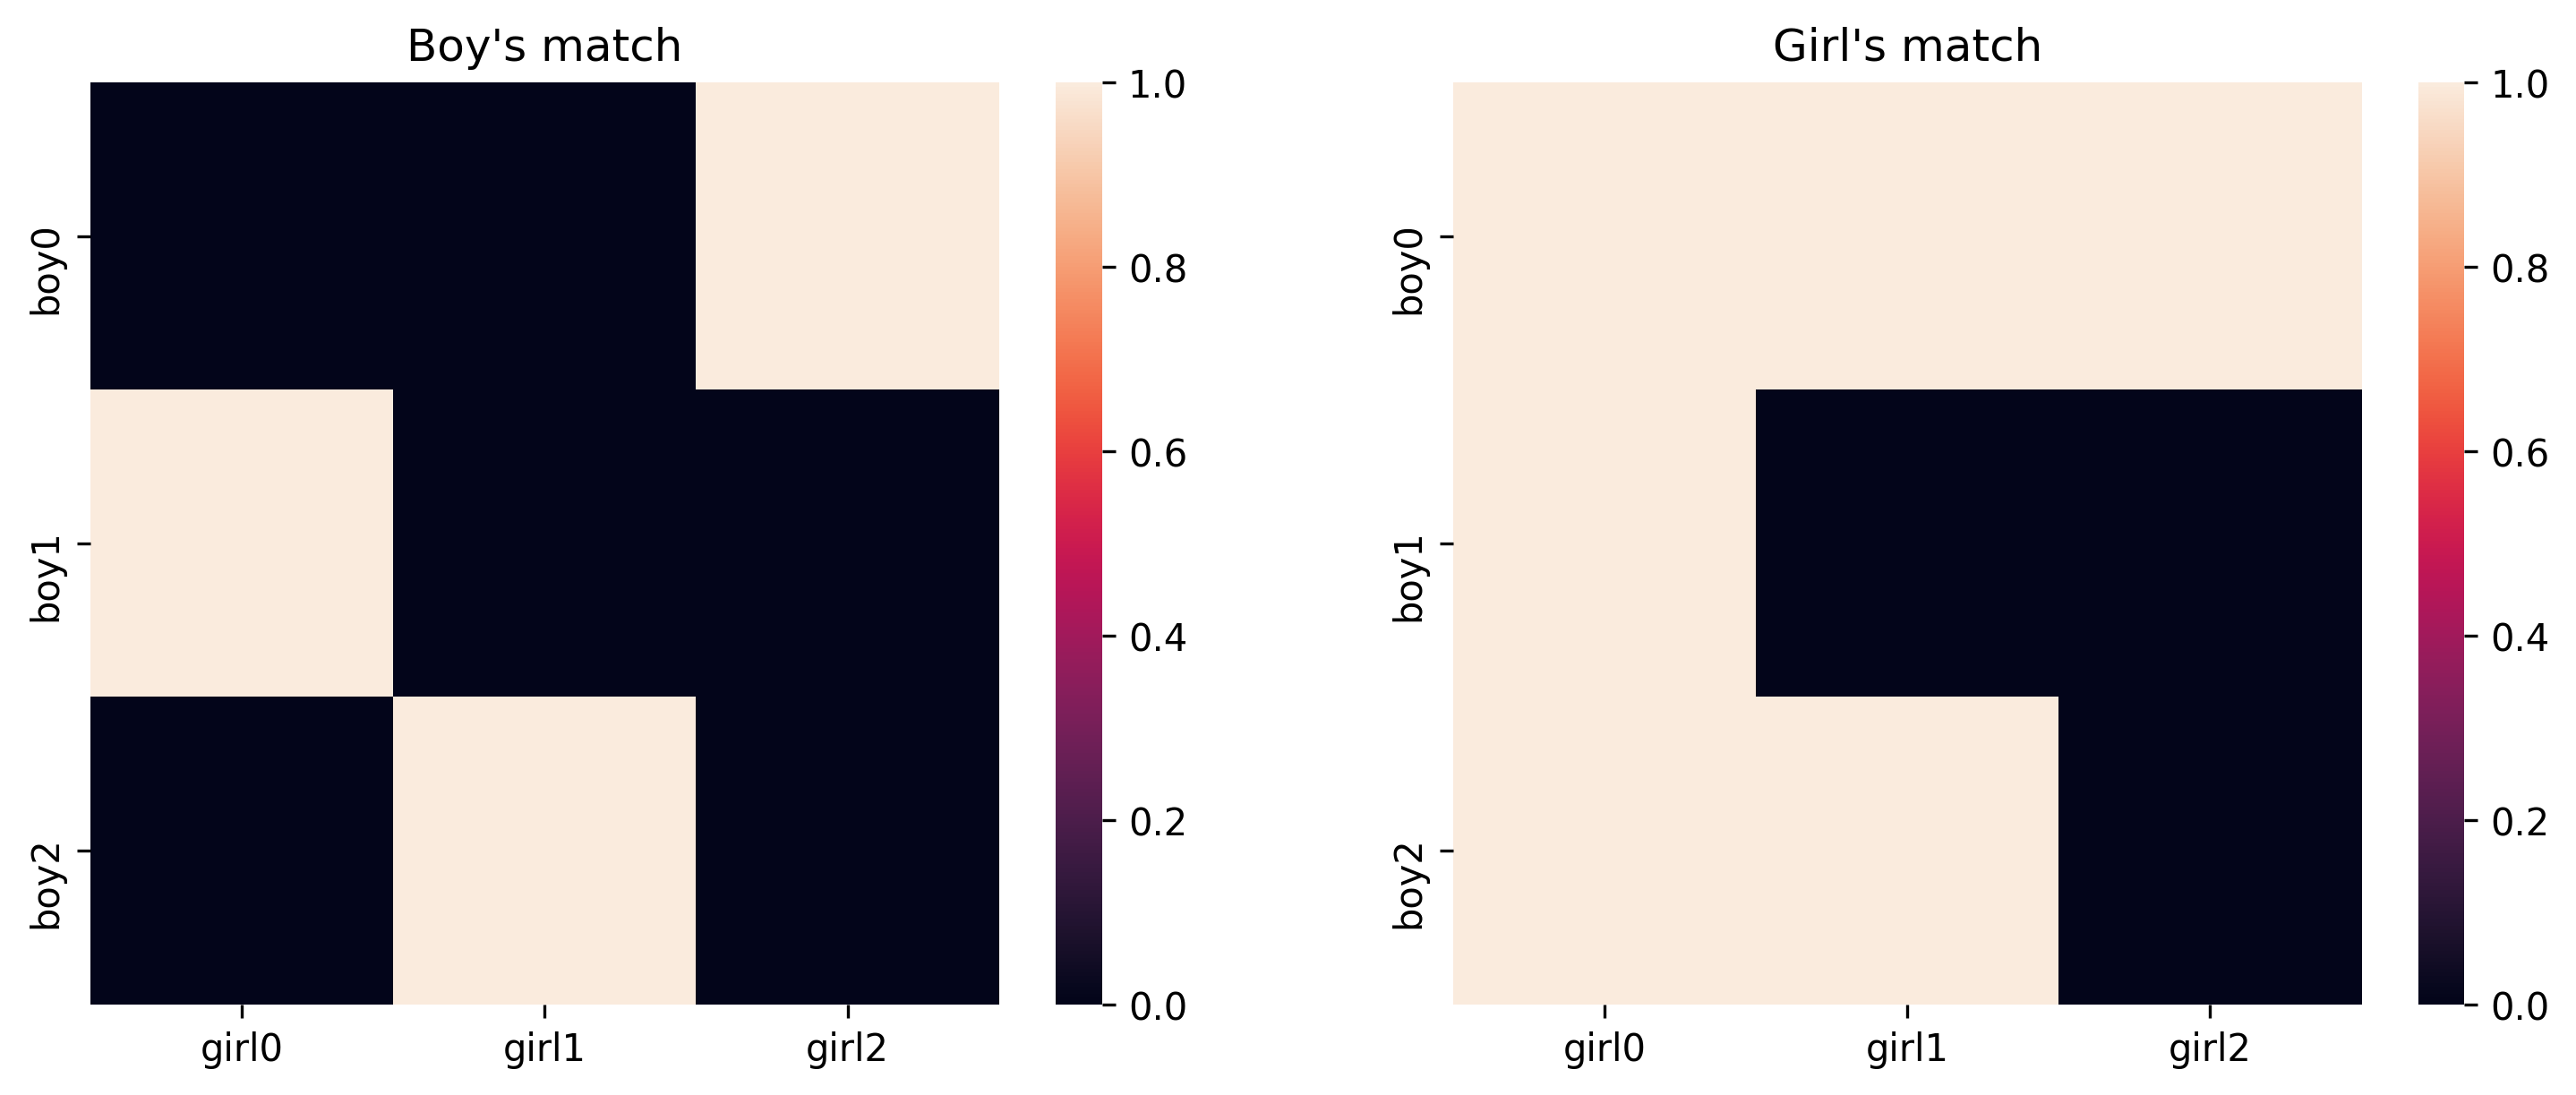

In [9]:
match = Run(boy_pref, girl_pref, 10)

In [10]:
RogueCoupleCheck(match.reshape((9,1)), boy_pref, girl_pref)

0